# **Movie Recommendation System Based On Content & Popularity**

### **Abstract**

The project aims to create movie recommendation system with algorithms, including content-based, popularity-based, and collaborative filtering methods. For this, we will use 2 CSVs - movies.csv and credits.csv with over 4800 movies.

#### **Data Explanation:**

1. movies.csv
- budget: The budget allocated for producing the movie.
- genres: The genres or categories the movie belongs to, listed as JSON array objects.
- homepage: The URL of the movie's official website, if available.
- id: Unique identifier for the movie.
- keywords: Keywords or descriptive terms associated with the movie, listed as JSON array objects.
- original_language: The original language in which the movie was produced.
- original_title: The original title of the movie.
- overview: A brief summary or synopsis of the movie.
- popularity: A metric indicating the relative popularity of the movie.
- production_companies: The production companies involved in making the movie, listed as JSON array objects.
- production_countries: The countries where the movie was produced, listed as JSON array objects.
- release_date: The date when the movie was released.
- revenue: The revenue generated by the movie.
- runtime: The duration of the movie in minutes.
- spoken_languages: The languages spoken in the movie, listed as JSON array objects.
- status: The release status of the movie (e.g., Released, Post Production, etc.).
- tagline: A memorable or catchy phrase associated with the movie.
- title: The title of the movie.
- vote_average: The average rating given to the movie by viewers.
- vote_count: The total number of votes/ratings received by the movie.

2. credits.csv
- movie_id: Unique identifier for the movie.
- title: The title of the movie.
- cast: Details about the cast involved in the movie, including their character names, genders, and roles, listed as JSON array objects.
- crew: Information about the crew members working on the movie, including their roles and names, listed as JSON array objects.

In [45]:
# Imports required for the project
import pandas as pd
from typing import List
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
#--- Read in dataset ----
movies = pd.read_csv('./data/movies.csv')

#--- Inspect data ---
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
#--- Read in dataset ----
credits = pd.read_csv("./data/credits.csv")

#--- Inspect data ---
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
# Merging the two dataframes on column column - title
movies_credits_df = pd.merge(movies, credits, on="title")

#--- Inspect data ---
movies_credits_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Data Transformation.

- Function 'convert_json_to_array' to parse and convert JSON data into an array format.

    Modify the 'keywords' column in the DataFrame 'movies_credits_df' by applying the function 'convert_json_to_array' to parse and convert JSON data into an array format.

- Function update_cast' with 'order' as the parameter, to limit the number of cast members to 5.

- Function 'update_crew' with 'job' as the parameter, to filter the crew members based on specific job roles (e.g., 'Screenplay', 'Producer', 'Editor', 'Writer', 'Director').

In [8]:
def convert_json_to_array(json_string: str):
    names = []

    array = ast.literal_eval(json_string)
    for item in array:
        names.append(item['name'] or None)

    return names


def convert_array_to_string(array: List):
    return ' '.join(array).lower()


def update_cast(key: str, value:  int):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] <= value:
                result.append(item['name'].strip().lower())
        return result
    return inner_function


def update_crew(key: str, values: List[str]):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] in values:
                result.append(item['name'].strip().lower())
        return result
    return inner_function

movies_credits_df['genres'] = movies_credits_df['genres'].apply(convert_json_to_array)
movies_credits_df['keywords'] = movies_credits_df['keywords'].apply(convert_json_to_array)
movies_credits_df['cast']=movies_credits_df['cast'].apply(update_cast('order',5))
movies_credits_df['crew']=movies_credits_df['crew'].apply(update_crew('job',['Screenplay', 'Producer', 'Editor', 'Writer', 'Director']))

#--- Inspect data ---
movies_credits_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,..."


## Data Cleaning and Preprocessing.
Removing columns with less relevant data in the 'movies_credits_df' DataFrame:

- 'homepage', 'original_language', 'overview', 'id', 'spoken_languages', 'status', 'tagline', 'movie_id', 'production_companies', and 'production_countries'

Removing rows with null values

In [9]:
movies_credits_df.drop(['homepage', 'original_language', 'overview', 'id', 'spoken_languages', 'status', 'tagline', 'movie_id', 'production_companies', 'production_countries'], axis=1, inplace=True)
movies_credits_df.dropna(inplace = True)

#--- Inspect data ---
movies_credits_df.head()

,budget,genres,keywords,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer..."
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br..."
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,..."


## Decade-Wise Movie Count Calculation

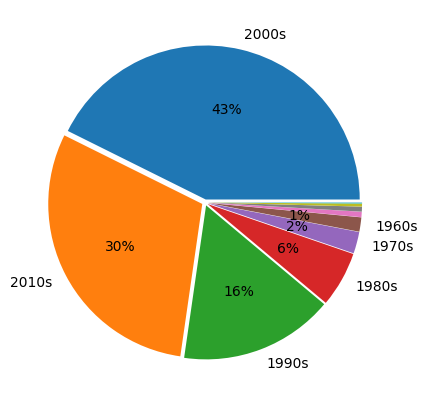

In [12]:
def count_pie(series):
    counts = series.value_counts()
    counts = counts/counts.sum()
    labels = ['' if num < 0.01 else str(year)
              for (year, num) in counts.items()]
    f, ax = plt.subplots(figsize=(5,5))
    explode = [0.02 if counts.iloc[i] <
               100 else 0.001 for i in range(counts.size)]
    plt.pie(counts, labels=labels, autopct=lambda x: '{:1.0f}%'.format(
        x) if x > 1 else '', explode=explode)
    # plt.show()
    return counts

movies_credits_df['release_date'].dropna(inplace=True)
temp_dates = movies_credits_df['release_date'].apply(lambda x: str((int(x[0:4])//10)*10)+'s')

#--- Inspect data ---
res = count_pie(temp_dates)
result = round(res,3)

## Genre Analysis and Visualization.

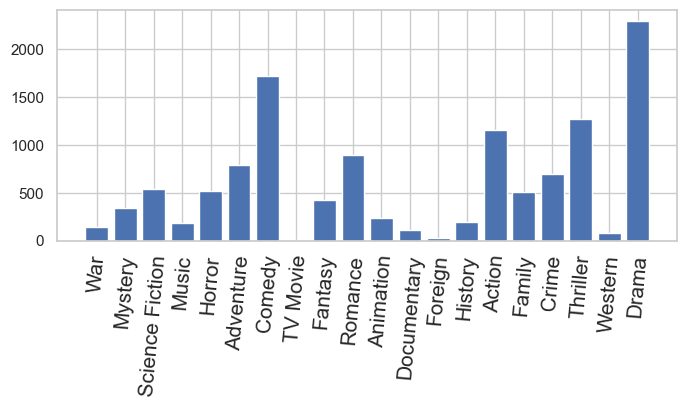

[('Drama', 2299),
 ('Comedy', 1723),
 ('Thriller', 1275),
 ('Action', 1156),
 ('Romance', 895),
 ('Adventure', 792),
 ('Crime', 697),
 ('Science Fiction', 538),
 ('Horror', 520),
 ('Family', 514),
 ('Fantasy', 425),
 ('Mystery', 348),
 ('Animation', 234),
 ('History', 197),
 ('Music', 185),
 ('War', 144),
 ('Documentary', 109),
 ('Western', 82),
 ('Foreign', 34),
 ('TV Movie', 8)]

In [20]:
series = movies_credits_df.genres
sns.set(style="whitegrid")
total_genres=[]

series.apply(lambda x: total_genres.extend(x))
unique_genres = list(set(total_genres))

values1 = []
genre_series = pd.Series(total_genres)
for i in unique_genres:
    count = sum(genre_series == i)
    values1.append((i, count))
    
values1
dictionary = {}
for item in values1[:30]:
    dictionary[item[0]] = item[1]

values1 = sorted(values1, key=lambda x: x[1], reverse= True)
    
plt.subplots(figsize=(8, 3))
plt.xticks(rotation=85, fontsize=15)
plt.bar(dictionary.keys(), dictionary.values(), align="center")
plt.show()

#--- Inspect data ---
values1

## Keyword Analysis and Visualization.

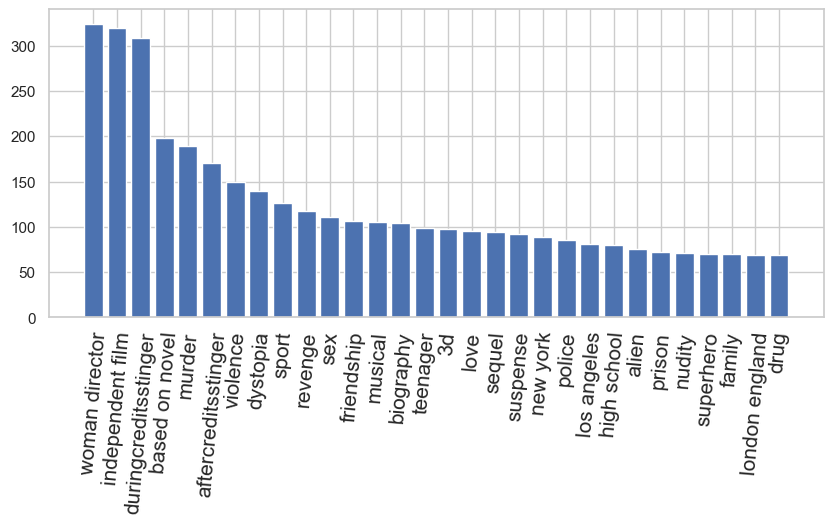

In [48]:
from collections import Counter

series = movies_credits_df.keywords
sns.set(style="whitegrid")

total_keywords = []
series.apply(lambda x: total_keywords.extend(x))

keyword_counts = Counter(total_keywords)

unique_keywords = list(keyword_counts.keys())

values2 = [(keyword, keyword_counts[keyword]) for keyword in unique_keywords]

values2 = sorted(values2, key=lambda x: x[1], reverse = True)

dictionary = {}
for item in values2[:30]:
    dictionary[item[0]] = item[1]

plt.subplots(figsize=(10, 4))
plt.xticks(rotation=85, fontsize=15)
plt.bar(dictionary.keys(), dictionary.values(), align="center")
plt.show()

## Genre Word Cloud Visualization.

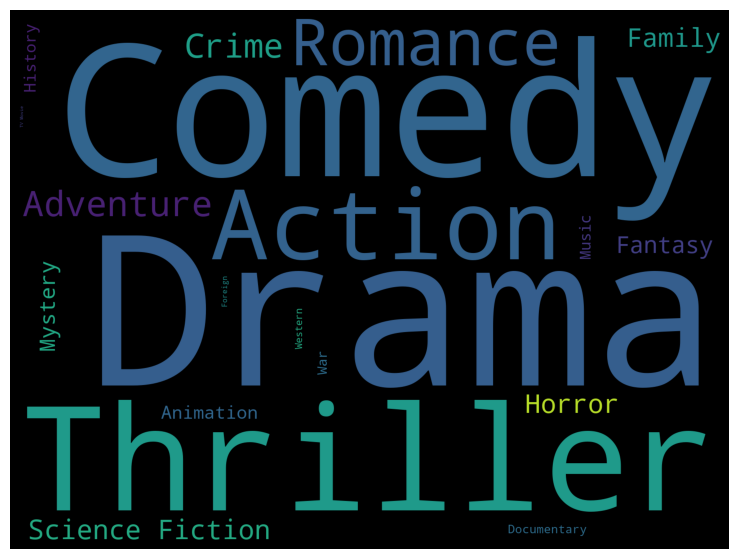

[('Drama', 2299),
 ('Comedy', 1723),
 ('Thriller', 1275),
 ('Action', 1156),
 ('Romance', 895),
 ('Adventure', 792),
 ('Crime', 697),
 ('Science Fiction', 538),
 ('Horror', 520),
 ('Family', 514),
 ('Fantasy', 425),
 ('Mystery', 348),
 ('Animation', 234),
 ('History', 197),
 ('Music', 185),
 ('War', 144),
 ('Documentary', 109),
 ('Western', 82),
 ('Foreign', 34),
 ('TV Movie', 8)]

In [25]:
series = movies_credits_df.genres
word_cloud = wc.WordCloud(background_color="black", margin=20, width=800,
                           height=600, prefer_horizontal=0.7, max_words=50, scale=2)

total_genres=[]

series.apply(lambda x: total_genres.extend(x))

unique_genres = list(set(total_genres))

values3 = []
genre_series = pd.Series(total_genres)

for i in unique_genres:
    count = sum(genre_series == i)
    values3.append((i, count))

values3 = sorted(values3, key=lambda x: x[1], reverse = True)

dictionary = {}
for item in values3:
    dictionary[item[0]] = item[1]

word_cloud.generate_from_frequencies(dictionary)
plt.subplots(figsize=(12, 7))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

#--- Inspect data ---
values3

## Correlation Analysis and Visualization.

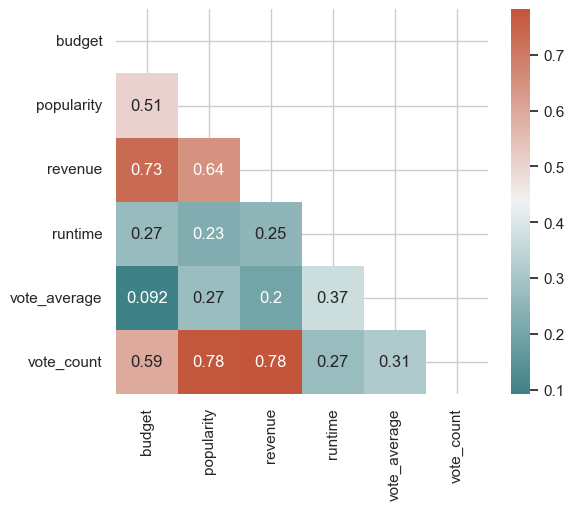

In [31]:

numeric_columns = movies_credits_df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]

# Calculate the correlation matrix between above columns
cor = numeric_columns.corr()

plt.subplots(figsize=(6,5))
mask = np.triu(np.ones_like(cor, dtype=bool))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)
plt.show()

## Feature Combination in DataFrame.

In [36]:
# 'combine_all_features' function is applied to the specified columns 'genres', 'keywords', 'cast', and 'crew' 
# to combine and concatenate the values into single string

def combine_all_features(features: List[str]):
    def inner_function(series: pd.core.series.Series):
        result = ''
        for feature in features:
            result += (' '.join(series[feature]) + ' ')
        return result
    return inner_function

In [37]:
movies_credits_df["feature"] = movies_credits_df.apply(combine_all_features(['genres', 'keywords', 'cast', 'crew']), axis=1)
movies_credits_df['feature']

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4804    Action Crime Thriller united states–mexico bar...
4805    Comedy Romance  edward burns kerry bishé marsh...
4806    Comedy Drama Romance TV Movie date love at fir...
4807      daniel henney eliza coupe bill paxton alan r...
4808    Documentary obsession camcorder crush dream gi...
Name: feature, Length: 4806, dtype: object

## Movie Title to DataFrame Index Mapping.

In [38]:
# Establishing a mapping of movie titles to their corresponding DataFrame indices.
indices = pd.Series(movies_credits_df.index, index=movies_credits_df["title"])

# ensure that there are no duplicate entries in the 'indices' Series
indices.drop_duplicates(inplace=True)
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4806, dtype: int64

## Movie Recommendation Based on Cosine Similarity with TF-IDF.

We will use scikit-learn library for text vectorization and similarity calculation, including 'CountVectorizer,' 'TfidfVectorizer,' and 'cosine_similarity.'

#### **Steps**
- During vectorization, we will use 'stop_words' as 'english' to remove common English words from the text data.
- Create a 'tfidf_matrix' using the 'tfidf' vectorizer. This matrix represents the TF-IDF (Term Frequency-Inverse Document Frequency) values for each movie's features.
- Calculate the cosine similarity between the movies
- Generate a list of similarity scores
- Identify the most similar movies. 
- Extract the indices of the 10 most similar movies to obtain movie recommendations.
- Retrieve the titles of the recommended movies.

In [44]:
# We will want to recommend movies most similar to movie 'Avatar'
title = 'Avatar'

# Use 'stop_words' as 'english' to remove common English words from the text data
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(movies_credits_df['feature'])

# Cosine similarity between the movies based on the 'tfidf_matrix' and store the result in 'cosine_sim_tfidf.'
cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Index of the movie with the given 'title' by looking it up in the 'indices' Series
index = indices[title]

# List of similarity scores by enumerating through 'cosine_sim_tfidf' at the index corresponding to the movie.
similarity_scores = list(enumerate(cosine_sim_tfidf[index]))

# Similarity scores in descending order to identify the most similar movies.
similarity_scores = sorted( similarity_scores, key= lambda x: x[1] ,reverse= True)

# Indices of the 10 most similar movies to obtain movie recommendations and store in movie_indices
movie_indices = [i for i,v in similarity_scores[1:11]]

# Titles of the recommended movies and store in variable 'recommend1'
recommend1 = movies_credits_df.iloc[movie_indices]['title']
recommend1

2405                        Aliens
25                         Titanic
838                         Alien³
575                    Vanilla Sky
279     Terminator 2: Judgment Day
278             Planet of the Apes
902                  Jerry Maguire
2200                       Lockout
1349                         Aloha
3161                         Alien
Name: title, dtype: object

## Movie Recommendation Based on Cosine Similarity with CountVectorizer.

#### **Steps**

- Create a 'CountVectorizer' to convert text data into a matrix of word counts.
- Apply the 'fit_transform' method to the 'feature' column. 
- Calculate the cosine similarity between the movies based on the 'count_matrix'.
- Create a list of similarity scores for the movie with the given 'title'.
- Sort the similarity scores in descending order to identify the most similar movies.
- Extract the indices of the 10 most similar movies.
- Retrieve the titles of the recommended movies using 'iloc'.

In [47]:
# 'CountVectorizer' named 'count' to convert text data into a matrix of word counts
count = CountVectorizer(stop_words='english')

# Generate a 'count_matrix' by applying the 'fit_transform' method to the 'feature' column of the DataFrame using the 'count' vectorizer
# This matrix represents the word counts for each movie's features.
count_matrix = count.fit_transform(movies_credits_df['feature'])

# Cosine similarity between the movies based on the 'count_matrix' and store the result in 'cosine_sim_count.'
cosine_sim_count = cosine_similarity(count_matrix, count_matrix)

# Index of the movie with the given 'title' by looking it up in the 'indices' Series.
index = movies_credits_df[movies_credits_df['title'] == title].index[0]

# List of similarity scores for the movie with the given 'title' by enumerating through 'cosine_sim_count' at the index corresponding to the movie.
similarity_scores = list(enumerate(cosine_sim_count[index]))

# Similarity scores in descending order to identify the most similar movies
sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:11]

# Extract the indices of the 10 most similar movies to obtain movie recommendations and stored in the 'movie_indices' list
movie_indices = [i[0] for i in sorted_scores]

# Titles of the recommended movies using 'iloc' and stored in 'recommend2' variable.
recommend2 = movies_credits_df.iloc[movie_indices]['title']

recommend2

2405                        Aliens
25                         Titanic
279     Terminator 2: Judgment Day
2200                       Lockout
282                      True Lies
1003                       The One
3442                The Terminator
94         Guardians of the Galaxy
587                      The Abyss
902                  Jerry Maguire
Name: title, dtype: object